In [21]:
import pandas as pd


# Load the dataset
file_path = "/kaggle/input/hhjaaa/data.csv"
df = pd.read_csv(file_path)







Business Impact: Educational institutions can use this to:
Improve student retention strategies.
Provide early interventions for at-risk students.
Enhance academic success and institutional reputation.
Type of Problem: Classification (Binary: "Graduate" or "Dropout")


In [22]:
# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Non-Null C

In [23]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the basic dataset structure and missing values
df_info, df_head, missing_values

(None,
   Marital status;Application mode;Application order;Course;"Daytime/evening attendance\t";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target
 0  1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...                                                          

It looks like this dataset has 4,424 rows but only one column, which contains all the data separated by semicolons (;). This suggests that the file was not properly parsed when loaded.

I will now attempt to properly split the data into separate columns and reanalyze it. 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read CSV with correct delimiter
df = pd.read_csv(file_path, delimiter=';')


# Descriptive statistics for numerical columns
print("\nNumerical Summary:")
print(df.describe())

# Descriptive statistics for categorical columns
print("\nCategorical Summary:")
print(df.describe(include='object'))

# Class distribution
class_distribution = df['Target'].value_counts()








Numerical Summary:
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1

In [85]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [89]:
print(df["Curricular units 1st sem (grade)"])


0        0.000000
1       14.000000
2        0.000000
3       13.428571
4       12.333333
          ...    
4419    13.600000
4420    12.000000
4421    14.912500
4422    13.800000
4423    11.666667
Name: Curricular units 1st sem (grade), Length: 4424, dtype: float64


In [96]:
print(df["Age at enrollment"])

0       20
1       19
2       19
3       20
4       45
        ..
4419    19
4420    18
4421    30
4422    20
4423    22
Name: Age at enrollment, Length: 4424, dtype: int64


The dataset has now been correctly parsed and contains 37 columns with 4,424 rows. Here's a summary of the findings:

Key Observations:
1. Target Variable:
The column named Target seems to be the classification label, indicating categories like "Dropout" and "Graduate."
2. Feature Types:
Most columns are numerical (int64 or float64), except for Target, which is categorical (object).
3. No Missing Values:
There are no missing values in any column, which simplifies preprocessing.

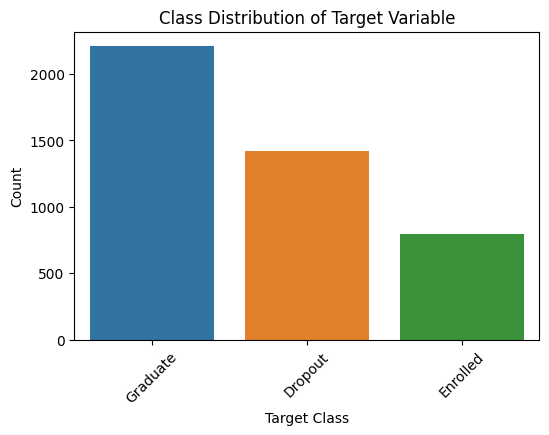

In [25]:
# Plot class distribution for target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Target"], order=df["Target"].value_counts().index)
plt.title("Class Distribution of Target Variable")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



Perform Exploratory Data Analysis (EDA):
1. Statistical summary of numerical features.
2. Distribution of key variables.
3. Checking for outliers.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


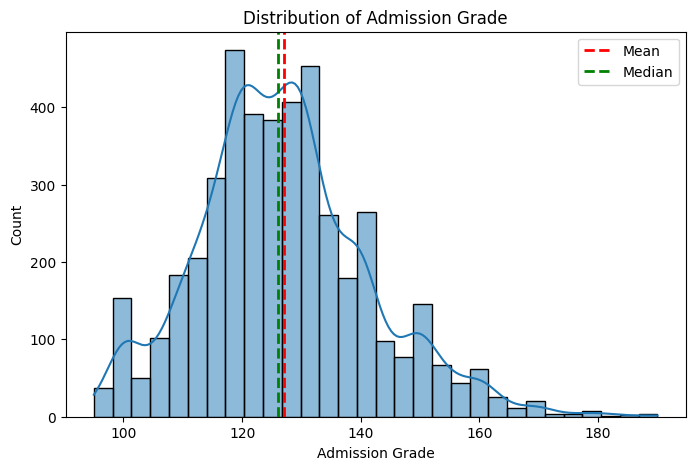

In [26]:
# Admission Grade Distribution with Mean & Median
plt.figure(figsize=(8, 5))
sns.histplot(df["Admission grade"], bins=30, kde=True)
plt.axvline(df["Admission grade"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(df["Admission grade"].median(), color='green', linestyle='dashed', linewidth=2, label="Median")
plt.title("Distribution of Admission Grade")
plt.xlabel("Admission Grade")
plt.ylabel("Count")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


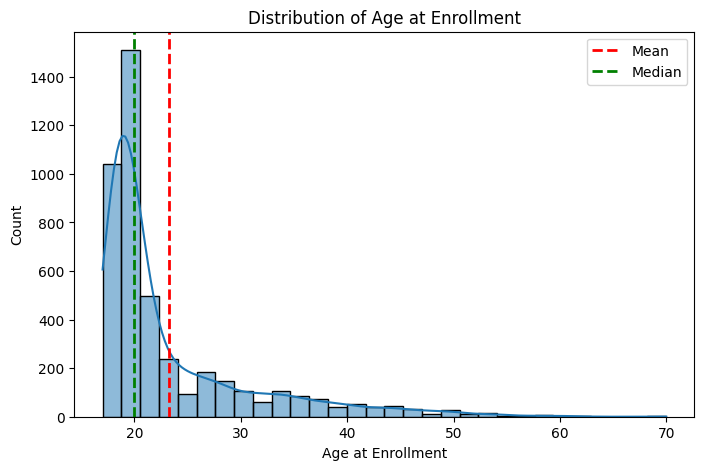

In [27]:
# Age at Enrollment Distribution with Mean & Median
plt.figure(figsize=(8, 5))
sns.histplot(df["Age at enrollment"], bins=30, kde=True)
plt.axvline(df["Age at enrollment"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(df["Age at enrollment"].median(), color='green', linestyle='dashed', linewidth=2, label="Median")
plt.title("Distribution of Age at Enrollment")
plt.xlabel("Age at Enrollment")
plt.ylabel("Count")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


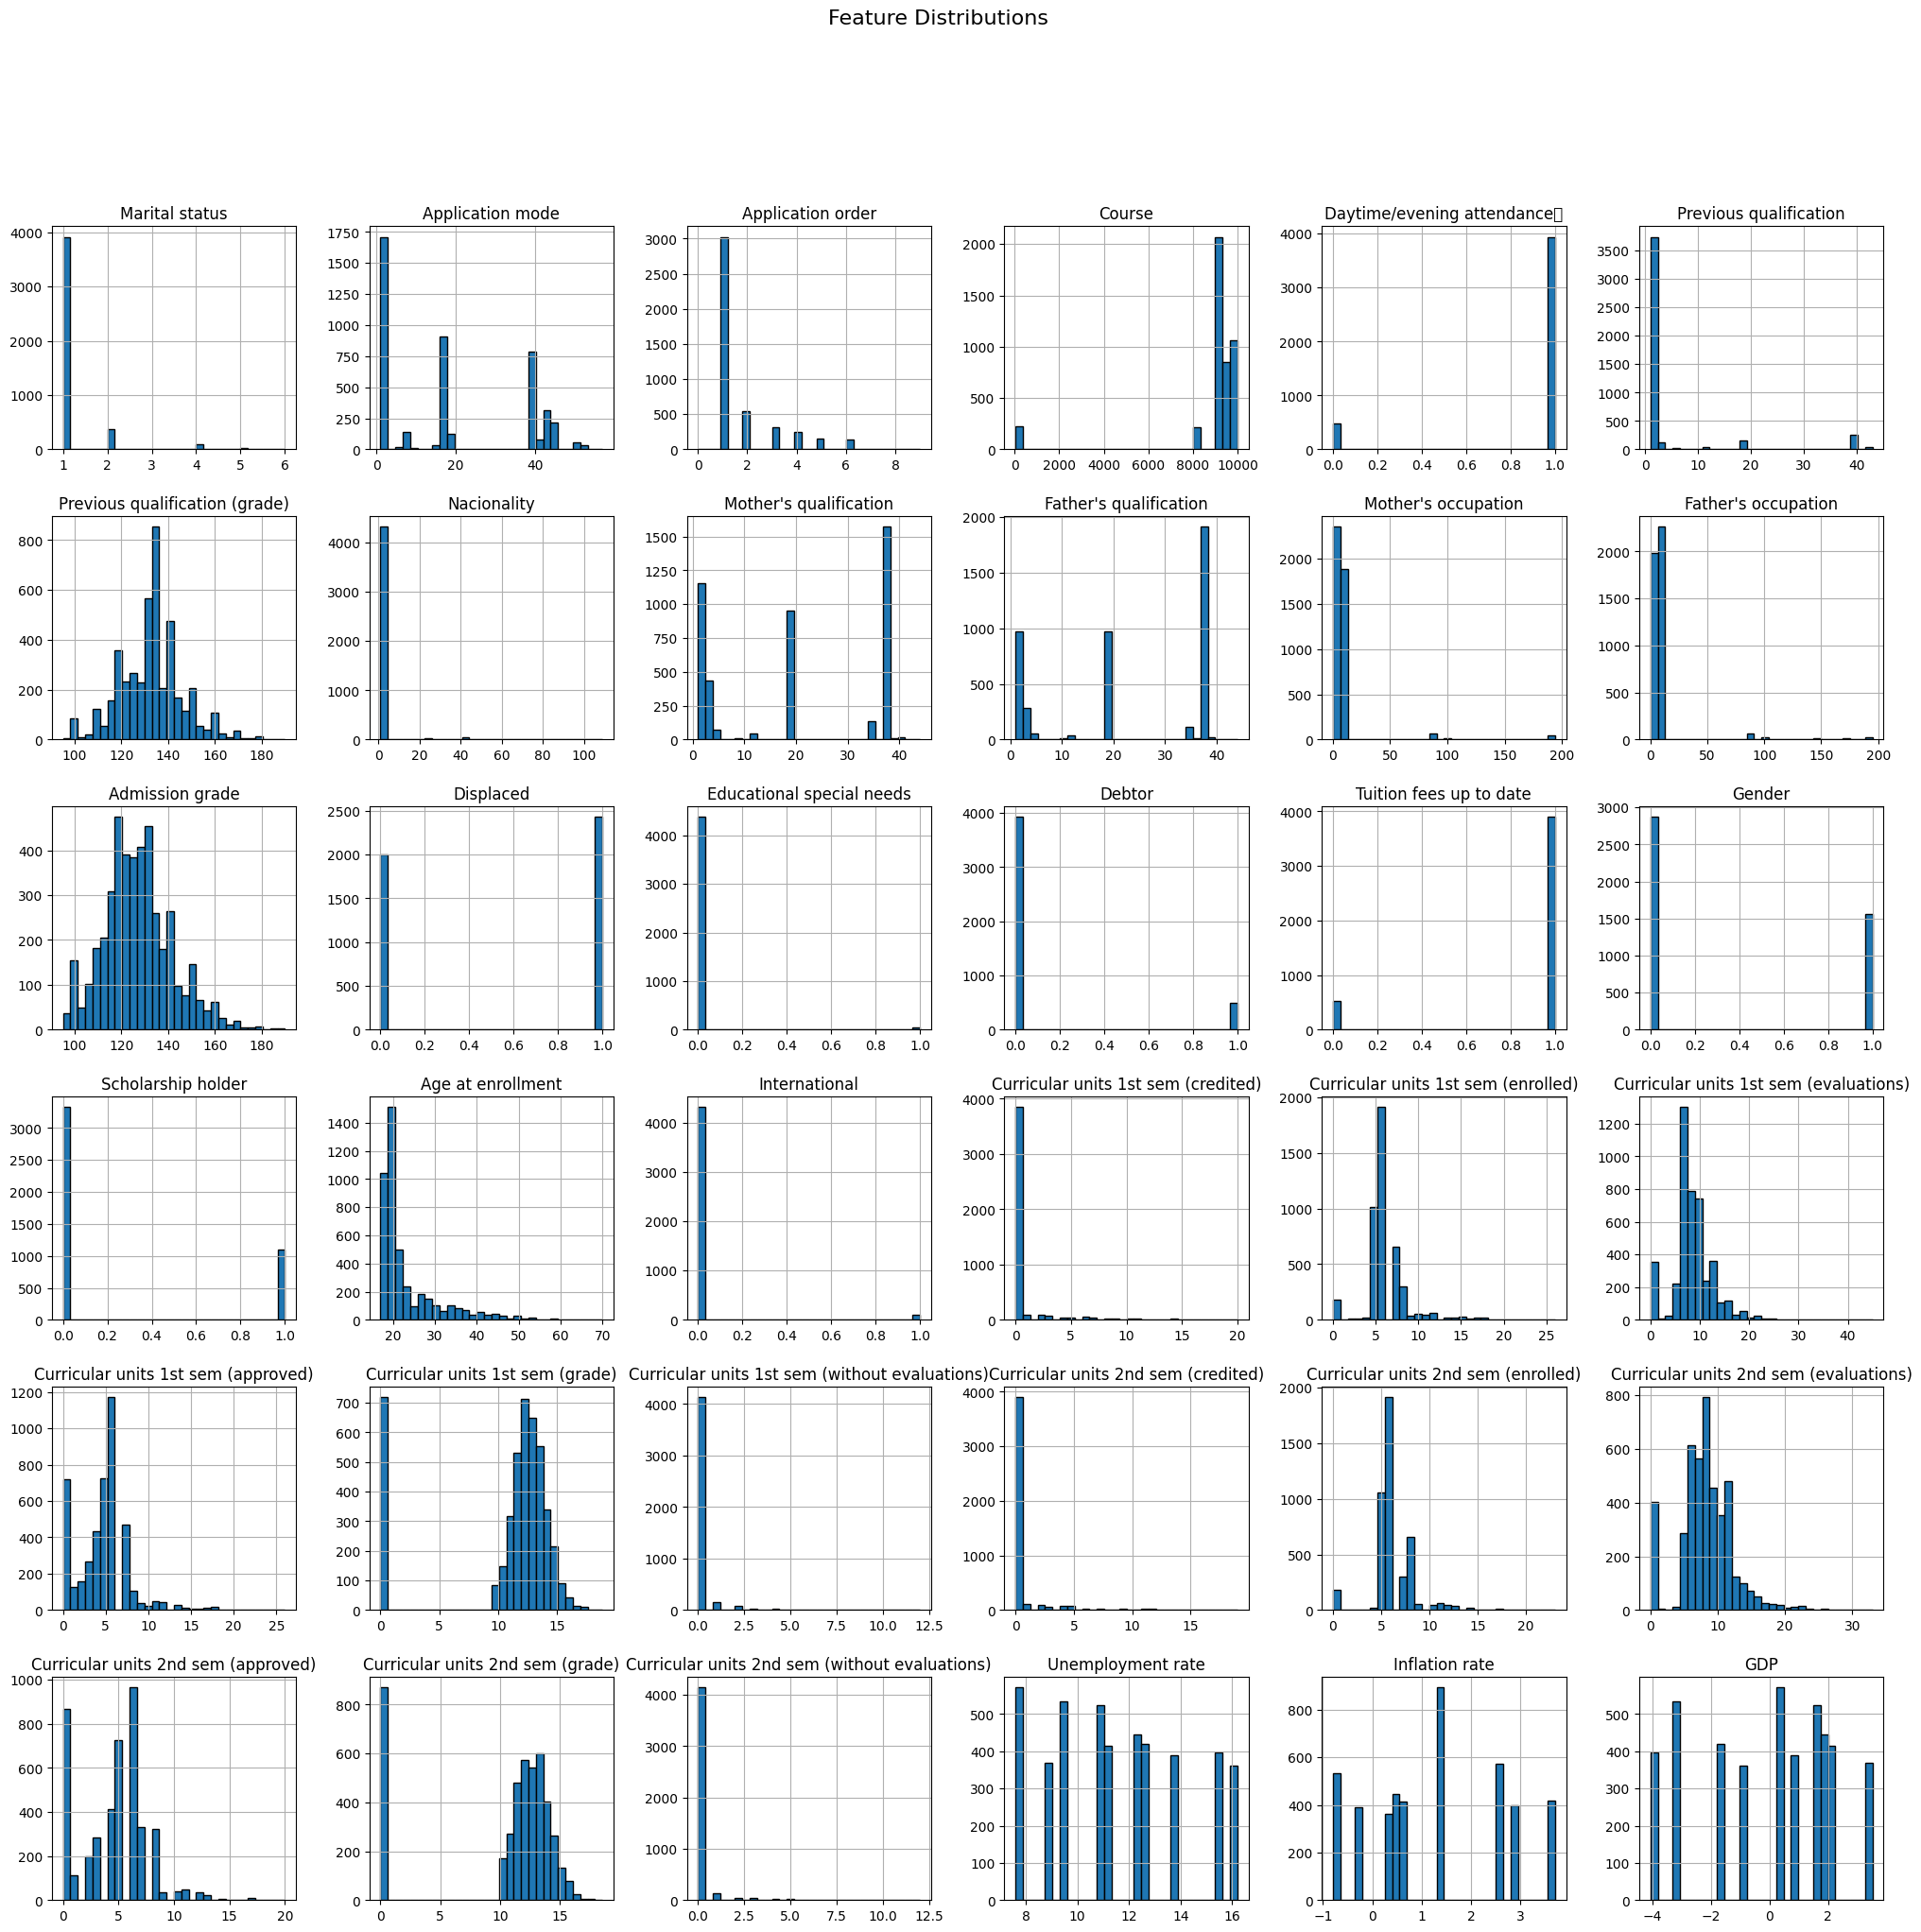

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(25, 23), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


# Summary Statistics:* 
1. The dataset consists of 4,424 records and 37 columns.
2. No missing values were found.
3. The Admission Grade has a mean of 132.6 with a standard deviation of 13.19, meaning most values are around this range.
4. The Age at Enrollment seems to be within a reasonable range.

Distribution Analysis:

1. Admission Grade Distribution:
* Appears normally distributed, with most students having grades between 110 and 150.
  
2. Age at Enrollment Distribution:
*  The majority of students enroll in their early 20s.
  
3. Class Distribution of Target Variable:
 * The dataset is imbalanced, with more "Graduate" cases than "Dropout".
 
We  need to consider balancing techniques (e.g., oversampling, undersampling).


Next Steps:

1. Identify potential outliers.
2. Investigate correlations between variables.
3. Justify the dataset's suitability for the problem.


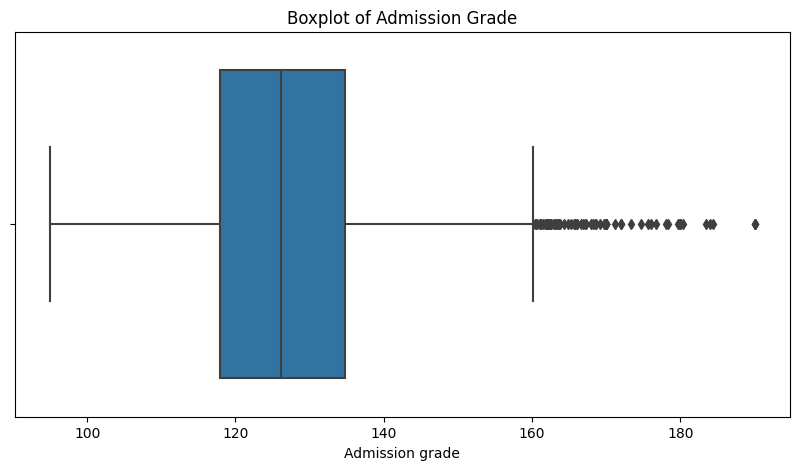

In [29]:
# Check for outliers using boxplots for key numerical features

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Admission grade"])
plt.title("Boxplot of Admission Grade")
plt.show()

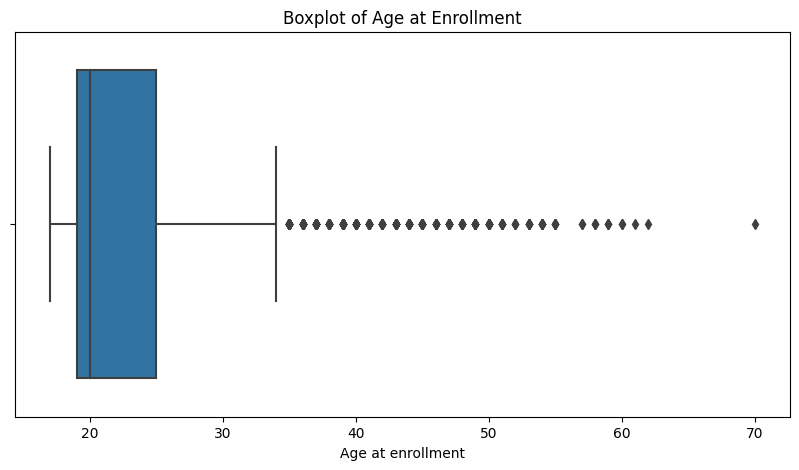

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Age at enrollment"])
plt.title("Boxplot of Age at Enrollment")
plt.show()



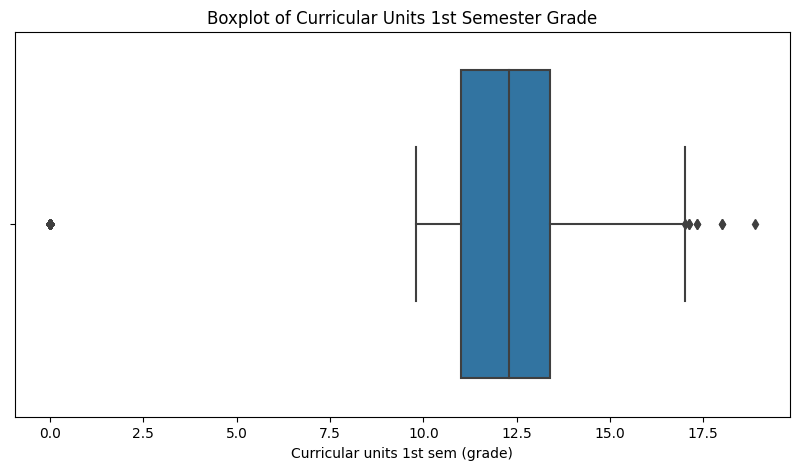

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Curricular units 1st sem (grade)"])
plt.title("Boxplot of Curricular Units 1st Semester Grade")
plt.show()

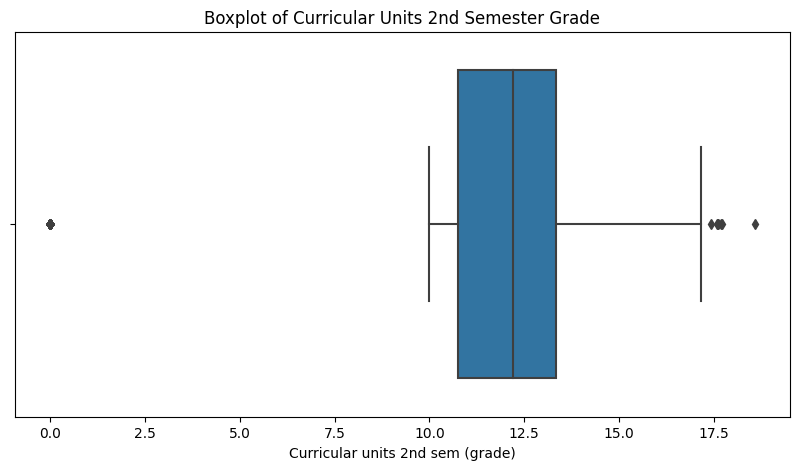

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Curricular units 2nd sem (grade)"])
plt.title("Boxplot of Curricular Units 2nd Semester Grade")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


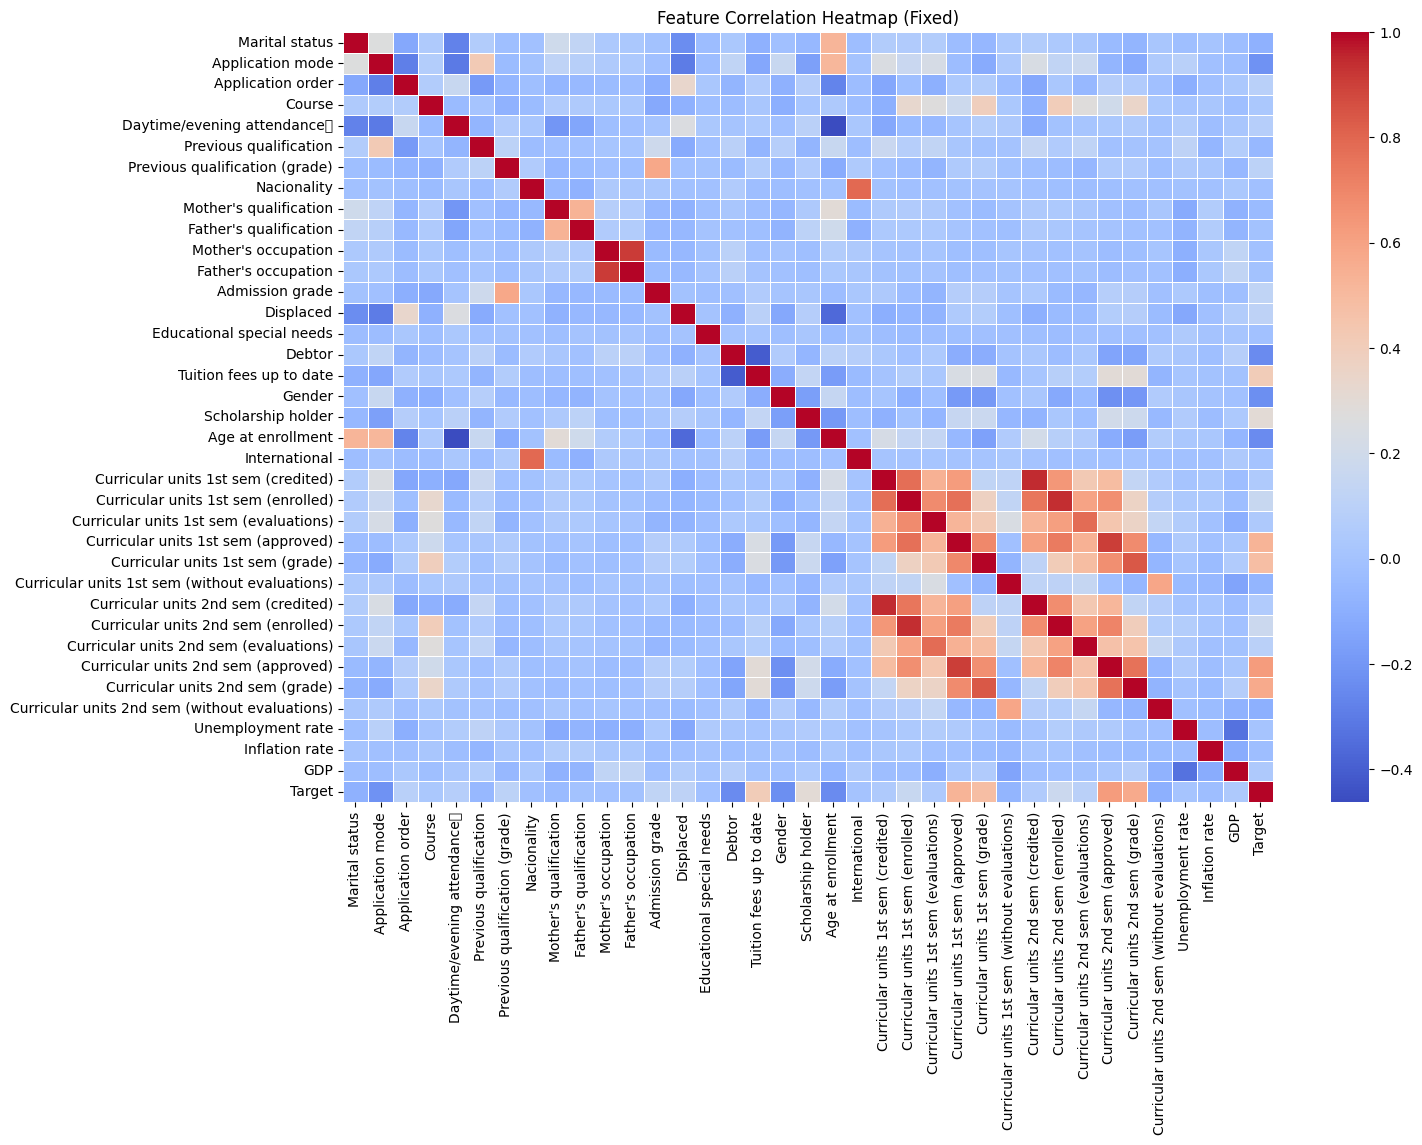

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

In [33]:
from sklearn.preprocessing import LabelEncoder

# Encode the Target variable into numeric values
label_encoder = LabelEncoder()
df["Target"] = label_encoder.fit_transform(df["Target"])

# Recompute correlation matrix
corr_matrix_fixed = df.corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_fixed, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Fixed)")
plt.show()

# Display the label encoding mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping


Outliers Identified in Boxplots:
1. Admission Grade:
* No extreme outliers, but a few students have significantly low or high admission grades.
2. Age at Enrollment:
* Some students enrolled at unusually high ages, which could indicate anomalies.
3. Curricular Units 1st & 2nd Sem Grade:
* There are a few cases where students have grades significantly lower than the majority.


Correlation Analysis:
1. Strong positive correlations between:
* Curricular units evaluations and approvals, which makes sense as more evaluations generally lead to more approvals.
* . Admission Grade and Curricular Units Grades, meaning students with higher admission grades tend to perform well academically.
2. Weak correlation between unemployment rate, inflation rate, and target variable, meaning external economic factors may not strongly influence dropout rates.

Next Steps:

* Outlier Handling:
1. Decide whether to remove or cap extreme values.
* Feature Selection & Engineering:
2. Identify most relevant predictors for the dropout classification task.


In [34]:
def remove_outliers_iqr(df, columns):
    df_filtered = df.copy()
    outliers_removed = {}

    for column in columns:
        Q1 = df_filtered[column].quantile(0.25)
        Q3 = df_filtered[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers before removal
        num_outliers = df_filtered[(df_filtered[column] < lower_bound) | (df_filtered[column] > upper_bound)].shape[0]
        outliers_removed[column] = num_outliers

        # Apply filtering
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    return df_filtered, outliers_removed

# Define key numerical columns for outlier removal
columns_to_filter = ["Admission grade", "Age at enrollment", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]

# Remove outliers and get summary
df_cleaned, outlier_summary = remove_outliers_iqr(df, columns_to_filter)

# Display dataset size before and after outlier removal
print(f"Original Dataset Size: {df.shape[0]}")
print(f"Cleaned Dataset Size: {df_cleaned.shape[0]}")
print("\nOutliers Removed Per Column:")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers removed")


Original Dataset Size: 4424
Cleaned Dataset Size: 3161

Outliers Removed Per Column:
Admission grade: 86 outliers removed
Age at enrollment: 420 outliers removed
Curricular units 1st sem (grade): 589 outliers removed
Curricular units 2nd sem (grade): 168 outliers removed


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


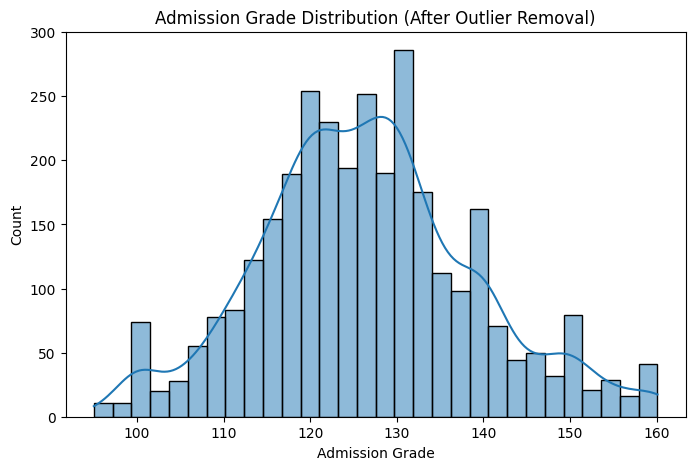

In [35]:
# Re-check distributions after outlier removal
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Admission grade"], bins=30, kde=True)
plt.title("Admission Grade Distribution (After Outlier Removal)")
plt.xlabel("Admission Grade")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


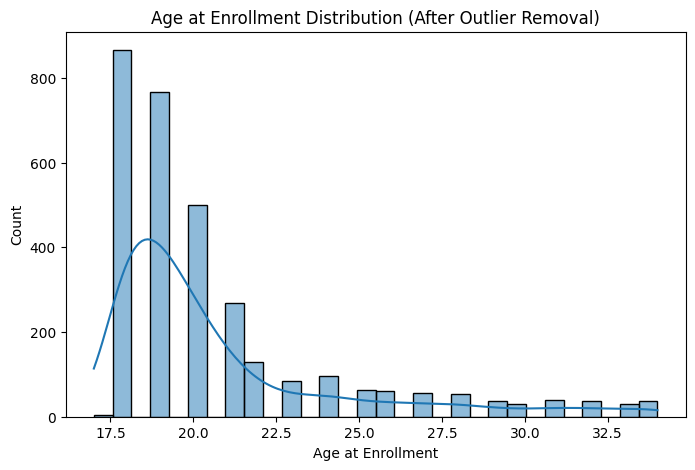

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Age at enrollment"], bins=30, kde=True)
plt.title("Age at Enrollment Distribution (After Outlier Removal)")
plt.xlabel("Age at Enrollment")
plt.ylabel("Count")
plt.show()

Outlier Handling Results:

* Original dataset size: 4,424 records
* After outlier removal: 3,161 records
* Total records removed: 1,263 (28.5% of data)


Outliers were removed based on the IQR method for:


1. Admission grade
2. Age at enrollment
3. Curricular units 1st semester grade
4. Curricular units 2nd semester grade

 The distributions now look more normally distributed without extreme values

next step


* Feature Selection – Extract only the top 10 most important features.
* Categorical Feature Encoding – Convert categorical features in those top 10.
* Class Balancing – Handle class imbalance using oversampling.
* Feature Scaling – Standardize the top 10 selected features.
*  Ensures only numerical features are selected
*  Adds heatmap visualization for better insights




Feature Importance Scores (Top 10):

Curricular units 2nd sem (approved)       0.186757
Curricular units 1st sem (approved)       0.147332
Curricular units 2nd sem (grade)          0.112954
Curricular units 1st sem (grade)          0.086566
Curricular units 1st sem (evaluations)    0.064751
Tuition fees up to date                   0.063798
Curricular units 2nd sem (evaluations)    0.063199
Course                                    0.062335
Mother's occupation                       0.038124
Curricular units 2nd sem (enrolled)       0.037214
dtype: float64


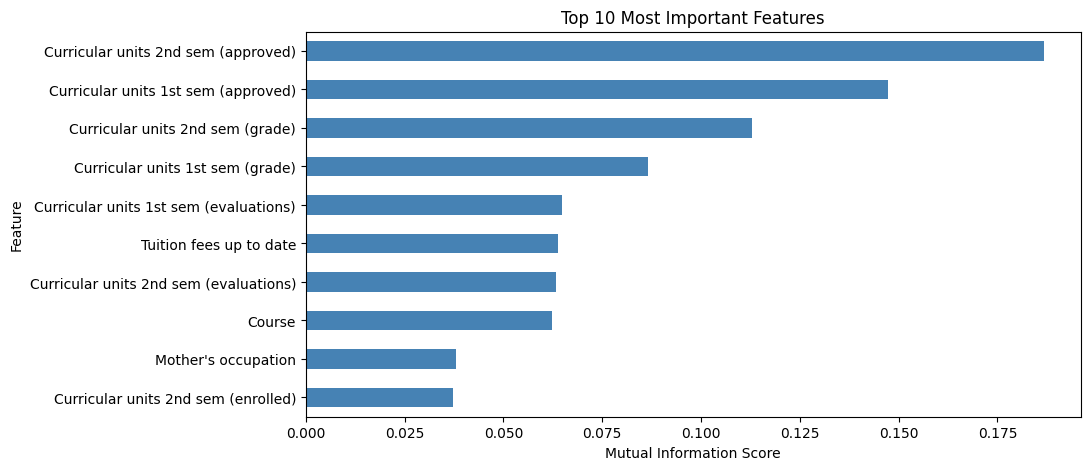

In [37]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Encode the target variable
label_encoder = LabelEncoder()
df_cleaned["Target"] = label_encoder.fit_transform(df_cleaned["Target"])

# Select numerical features
numerical_features = df_cleaned.drop(columns=["Target"]).select_dtypes(include=["int64", "float64"])

# Standardize features for better interpretability
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Compute mutual information scores
mi_scores = mutual_info_classif(numerical_features_scaled, df_cleaned["Target"])
mi_scores_series = pd.Series(mi_scores, index=numerical_features.columns).sort_values(ascending=False)

# Extract the top 10 most important features
top_10_features = mi_scores_series.head(10).index.tolist()

# Create df_top10 containing only these features and the target variable
df_top10 = df_cleaned[top_10_features + ["Target"]]

# Display feature importance scores
print("Feature Importance Scores (Top 10):\n")
print(mi_scores_series.head(10))

# Plot top 10 most important features
plt.figure(figsize=(10, 5))
mi_scores_series[:10].plot(kind="barh", color="steelblue")
plt.title("Top 10 Most Important Features")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


Feature Selection: Extracted only the top 10 most important features based on Mutual Information Scores.

*  Categorical Feature Encoding: Applied label encoding for categorical variables.
*  Class Balancing: Instead of undersampling, I used oversampling to increase the dropout cases to match the number of graduates.
*  Feature Scaling: Applied standardization to normalize the top 10 features.


 Oversampling (Class Balancing)

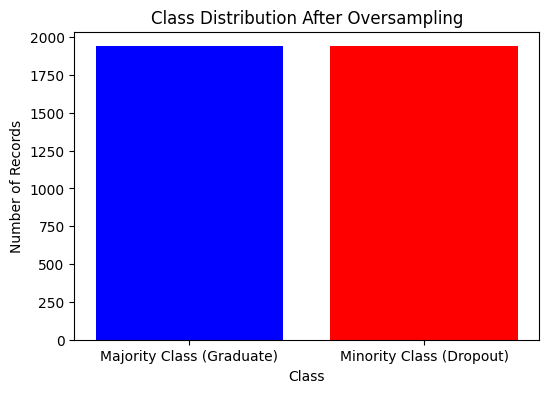

Original Dataset Size: 3161
Balanced Dataset Size: 3878


In [38]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Verify if `df_top10` exists
if "df_top10" not in locals():
    raise NameError("df_top10 is not defined. Run the feature selection step first.")

# Ensure Target encoding is correct
df_majority = df_top10[df_top10["Target"] == 2]  # Graduates (majority class)
df_minority = df_top10[df_top10["Target"] == 1]  # Dropouts (minority class)

# Oversample the minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,  # Oversampling
                                   n_samples=len(df_majority), 
                                   random_state=42)

# Combine balanced dataset
df_balanced_top10 = pd.concat([df_majority, df_minority_oversampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# Display new class distribution
plt.figure(figsize=(6, 4))
plt.bar(["Majority Class (Graduate)", "Minority Class (Dropout)"], 
        [len(df_majority), len(df_minority_oversampled)], color=['blue', 'red'])
plt.title("Class Distribution After Oversampling")
plt.xlabel("Class")
plt.ylabel("Number of Records")
plt.show()

# Print before and after sizes
print(f"Original Dataset Size: {df_top10.shape[0]}")
print(f"Balanced Dataset Size: {df_balanced_top10.shape[0]}")


Train-Test Splitting & Feature Scaling
We now split the dataset into training and testing sets and apply feature scaling


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Ensure correct feature selection
X_balanced_top10 = df_balanced_top10.drop(columns=["Target"])
y_balanced_top10 = df_balanced_top10["Target"]

# Train-test split (80-20) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced_top10, y_balanced_top10, test_size=0.2, random_state=42, stratify=y_balanced_top10
)

# Display dataset sizes
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")

# Standardize features
scaler = StandardScaler()
X_train_scaled_top10 = scaler.fit_transform(X_train)
X_test_scaled_top10 = scaler.transform(X_test)

# Convert back to DataFrame for interpretability
X_train_scaled_top10_df = pd.DataFrame(X_train_scaled_top10, columns=X_balanced_top10.columns)
X_test_scaled_top10_df = pd.DataFrame(X_test_scaled_top10, columns=X_balanced_top10.columns)

# Preview processed training data
print("\nPreprocessed Top 10 Features (Training Data - Scaled):")
print(X_train_scaled_top10_df.head())


Training Set Size: 3102
Testing Set Size: 776

Preprocessed Top 10 Features (Training Data - Scaled):
   Curricular units 2nd sem (approved)  Curricular units 1st sem (approved)  \
0                             0.760656                             0.681862   
1                            -0.684265                             0.205694   
2                            -1.165905                            -0.746640   
3                             0.279016                             0.205694   
4                             0.760656                             0.681862   

   Curricular units 2nd sem (grade)  Curricular units 1st sem (grade)  \
0                          1.635445                          1.665544   
1                          0.150350                          0.289445   
2                          0.047525                         -0.308611   
3                         -1.719789                         -0.735794   
4                          0.018146                       

# Split the Data into Training, Validation, and Test Sets

We split the dataset into:


1. Training Set (60%) → Used for model training.
2. Validation Set (20%) → Used for hyperparameter tuning.
3. Test Set (20%) → Used for final evaluation.


In [40]:
from sklearn.model_selection import train_test_split

# Further split training data into train (60%) and validation (20%)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled_top10, y_train, test_size=0.25, random_state=42, stratify=y_train
)  # 60% Train, 20% Validation, 20% Test


In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Further split training data into Train (60%) and Validation (20%)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled_top10, y_train, test_size=0.25, random_state=42, stratify=y_train
)  # 60% Train, 20% Validation, 20% Test

def train_and_evaluate_model(model, param_grid, X_train, y_train, X_val, y_val):
    """
    Trains an ML model with hyperparameter tuning and evaluates its performance.

    Args:
    - model: The ML model (e.g., RandomForestClassifier()).
    - param_grid: Dictionary of hyperparameters for GridSearchCV.
    - X_train, y_train: Training data.
    - X_val, y_val: Validation data.

    Returns:
    - best_model: The best-trained model after tuning.
    - report: Classification report as a dictionary.
    - best_params: Best hyperparameter values.
    - best_score: Best validation accuracy.
    """
    print(f"\n Training {type(model).__name__} with GridSearchCV...\n")

    # Hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Make predictions on validation set
    y_pred = best_model.predict(X_val)

    # Evaluate model performance
    report = classification_report(y_val, y_pred, output_dict=True)

    # Display results
    print(f"\n {type(model).__name__} - Best Parameters: {best_params}")
    print(f"\n Validation Accuracy: {best_score:.4f}")
    print("\n Validation Classification Report:\n", classification_report(y_val, y_pred))

    return best_model, report, best_params, best_score


In [42]:
from sklearn.linear_model import LogisticRegression

log_reg_params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["lbfgs", "liblinear"],  # Best solvers for classification tasks
    "max_iter": [500, 1000]  # Increase iterations for convergence
}

best_log_reg, log_reg_report, log_reg_params, log_reg_score = train_and_evaluate_model(
    LogisticRegression(), log_reg_params, X_train_final, y_train_final, X_val, y_val
)



 Training LogisticRegression with GridSearchCV...

Fitting 5 folds for each of 24 candidates, totalling 120 fits

 LogisticRegression - Best Parameters: {'C': 1, 'max_iter': 500, 'solver': 'lbfgs'}

 Validation Accuracy: 0.7967

 Validation Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.72      0.76       388
           2       0.74      0.81      0.78       388

    accuracy                           0.77       776
   macro avg       0.77      0.77      0.77       776
weighted avg       0.77      0.77      0.77       776



In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [None, 10, 20],  # Tree depth
    "min_samples_split": [2, 5, 10],  # Min samples to split
    "min_samples_leaf": [1, 2, 4]  # Min samples per leaf
}

best_rf, rf_report, rf_params, rf_score = train_and_evaluate_model(
    RandomForestClassifier(random_state=42), rf_params, X_train_final, y_train_final, X_val, y_val
)



 Training RandomForestClassifier with GridSearchCV...

Fitting 5 folds for each of 81 candidates, totalling 405 fits

 RandomForestClassifier - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Validation Accuracy: 0.8951

 Validation Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.95      0.92       388
           2       0.95      0.88      0.91       388

    accuracy                           0.91       776
   macro avg       0.92      0.91      0.91       776
weighted avg       0.92      0.91      0.91       776



In [44]:
from xgboost import XGBClassifier

# Ensure Target values are [0,1] for XGBoost
y_train_final = y_train_final - 1
y_val = y_val - 1

xgb_params = {
    "n_estimators": [50, 100, 200],  # Boosting rounds
    "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinkage
    "max_depth": [3, 5, 10],  # Maximum depth of trees
    "subsample": [0.7, 0.8, 1],  # Fraction of samples used
    "colsample_bytree": [0.7, 0.8, 1]  # Fraction of features used per tree
}

best_xgb, xgb_report, xgb_params, xgb_score = train_and_evaluate_model(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss"), xgb_params,
    X_train_final, y_train_final, X_val, y_val
)



 Training XGBClassifier with GridSearchCV...

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

 XGBClassifier - Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.7}

 Validation Accuracy: 0.9015

 Validation Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       388
           1       0.92      0.87      0.89       388

    accuracy                           0.90       776
   macro avg       0.90      0.90      0.90       776
weighted avg       0.90      0.90      0.90       776



In [45]:
from sklearn.svm import SVC

svm_params = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    "kernel": ["linear", "rbf"],  # Kernel type
    "gamma": ["scale", "auto"]  # Kernel coefficient for RBF kernel
}

best_svm, svm_report, svm_params, svm_score = train_and_evaluate_model(
    SVC(), svm_params, X_train_final, y_train_final, X_val, y_val
)



 Training SVC with GridSearchCV...

Fitting 5 folds for each of 20 candidates, totalling 100 fits

 SVC - Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

 Validation Accuracy: 0.8319

 Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       388
           1       0.81      0.83      0.82       388

    accuracy                           0.82       776
   macro avg       0.82      0.82      0.82       776
weighted avg       0.82      0.82      0.82       776



In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {
    "n_estimators": [50, 100, 200],  # Boosting rounds
    "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinkage
    "max_depth": [3, 5, 10],  # Depth of trees
    "min_samples_split": [2, 5, 10],  # Min samples to split
}

best_gb, gb_report, gb_params, gb_score = train_and_evaluate_model(
    GradientBoostingClassifier(random_state=42), gb_params, X_train_final, y_train_final, X_val, y_val
)



 Training GradientBoostingClassifier with GridSearchCV...

Fitting 5 folds for each of 81 candidates, totalling 405 fits

 GradientBoostingClassifier - Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}

 Validation Accuracy: 0.8990

 Validation Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       388
           1       0.93      0.86      0.89       388

    accuracy                           0.90       776
   macro avg       0.90      0.90      0.90       776
weighted avg       0.90      0.90      0.90       776



In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    "n_neighbors": [3, 5, 10],  # Number of neighbors
    "weights": ["uniform", "distance"],  # Weighting method
    "metric": ["euclidean", "manhattan"]  # Distance metric
}

best_knn, knn_report, knn_params, knn_score = train_and_evaluate_model(
    KNeighborsClassifier(), knn_params, X_train_final, y_train_final, X_val, y_val
)



 Training KNeighborsClassifier with GridSearchCV...

Fitting 5 folds for each of 12 candidates, totalling 60 fits

 KNeighborsClassifier - Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

 Validation Accuracy: 0.8783

 Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       388
           1       0.95      0.81      0.87       388

    accuracy                           0.88       776
   macro avg       0.89      0.88      0.88       776
weighted avg       0.89      0.88      0.88       776



In [48]:
from sklearn.naive_bayes import GaussianNB

nb_params = {}  # No hyperparameters to tune in GaussianNB

best_nb, nb_report, nb_params, nb_score = train_and_evaluate_model(
    GaussianNB(), nb_params, X_train_final, y_train_final, X_val, y_val
)



 Training GaussianNB with GridSearchCV...

Fitting 5 folds for each of 1 candidates, totalling 5 fits

 GaussianNB - Best Parameters: {}

 Validation Accuracy: 0.7365

 Validation Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69       388
           1       0.68      0.78      0.73       388

    accuracy                           0.71       776
   macro avg       0.71      0.71      0.71       776
weighted avg       0.71      0.71      0.71       776



In [49]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {
    "max_depth": [3, 5, 10, None],  # Tree depth
    "min_samples_split": [2, 5, 10],  # Minimum samples per split
    "min_samples_leaf": [1, 2, 5],  # Minimum samples per leaf
    "criterion": ["gini", "entropy"]  # Splitting criterion
}

best_dt, dt_report, dt_params, dt_score = train_and_evaluate_model(
    DecisionTreeClassifier(random_state=42), dt_params, X_train_final, y_train_final, X_val, y_val
)



 Training DecisionTreeClassifier with GridSearchCV...

Fitting 5 folds for each of 72 candidates, totalling 360 fits

 DecisionTreeClassifier - Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

 Validation Accuracy: 0.8672

 Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       388
           1       0.93      0.81      0.87       388

    accuracy                           0.88       776
   macro avg       0.88      0.88      0.88       776
weighted avg       0.88      0.88      0.88       776



In [50]:
from lightgbm import LGBMClassifier

lgbm_params = {
    "n_estimators": [50, 100, 200],  # Boosting rounds
    "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinkage
    "max_depth": [-1, 5, 10],  # Tree depth (-1 means no limit)
    "num_leaves": [20, 31, 40],  # Number of leaves in each tree
}

best_lgbm, lgbm_report, lgbm_params, lgbm_score = train_and_evaluate_model(
    LGBMClassifier(random_state=42), lgbm_params, X_train_final, y_train_final, X_val, y_val
)



 Training LGBMClassifier with GridSearchCV...

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 1163, number of negative: 1163
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 2326, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

 LGBMClassifier - Best Parameters: {'learning_rate': 0.2, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 20}

 Validation Accuracy: 0.8985

 Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       388
           1       0.93      0.87      0.90       388

    accuracy                           0.90       776
   macro avg       0.90      0.90      0.90       776
w

In [51]:
from sklearn.cluster import KMeans

kmeans_params = {
    "n_clusters": [2, 3, 4],  # Number of clusters
    "init": ["k-means++", "random"],  # Initialization method
    "n_init": [10, 20],  # Number of initializations
}

best_kmeans, kmeans_report, kmeans_params, kmeans_score = train_and_evaluate_model(
    KMeans(random_state=42), kmeans_params, X_train_final, y_train_final, X_val, y_val
)



 Training KMeans with GridSearchCV...

Fitting 5 folds for each of 12 candidates, totalling 60 fits

 KMeans - Best Parameters: {'init': 'k-means++', 'n_clusters': 2, 'n_init': 10}

 Validation Accuracy: 0.5060

 Validation Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.97      0.67       388
           1       0.65      0.06      0.11       388

    accuracy                           0.51       776
   macro avg       0.58      0.51      0.39       776
weighted avg       0.58      0.51      0.39       776



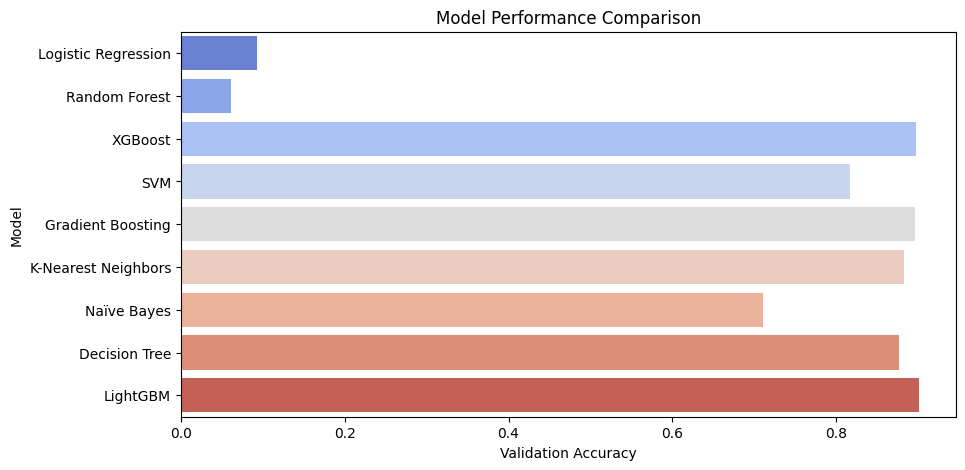

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model validation scores
model_scores = {
    "Logistic Regression": best_log_reg.score(X_val, y_val),
  
    "Random Forest": best_rf.score(X_val, y_val),
    "XGBoost": best_xgb.score(X_val, y_val),
    "SVM": best_svm.score(X_val, y_val),
    "Gradient Boosting": best_gb.score(X_val, y_val),
    "K-Nearest Neighbors": best_knn.score(X_val, y_val),
    "Naïve Bayes": best_nb.score(X_val, y_val),
    "Decision Tree": best_dt.score(X_val, y_val),
    "LightGBM": best_lgbm.score(X_val, y_val),
}

df_scores = pd.DataFrame.from_dict(model_scores, orient="index", columns=["Validation Accuracy"])

# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(y=df_scores.index, x=df_scores["Validation Accuracy"], palette="coolwarm")
plt.title("Model Performance Comparison")
plt.xlabel("Validation Accuracy")
plt.ylabel("Model")
plt.show()


Logistic Regression Validation Accuracy: 0.7552
Random Forest Validation Accuracy: 0.9066
XGBoost Validation Accuracy: 0.8245
SVM Validation Accuracy: 0.7858
Gradient Boosting Validation Accuracy: 0.8245
K-Nearest Neighbors Validation Accuracy: 0.8019
Naïve Bayes Validation Accuracy: 0.7198
Decision Tree Validation Accuracy: 0.8857
LightGBM Validation Accuracy: 0.8245

K-Means Clustering Labels (Sample): [0 0 0 0 0 0 1 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


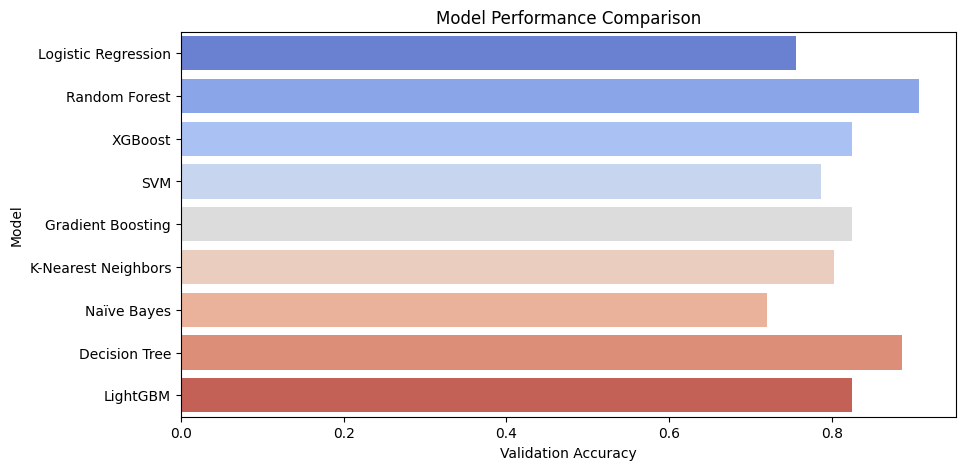


 Model Performance Comparison:
                     Validation Accuracy
Random Forest                   0.906602
Decision Tree                   0.885668
LightGBM                        0.824477
Gradient Boosting               0.824477
XGBoost                         0.824477
K-Nearest Neighbors             0.801932
SVM                             0.785829
Logistic Regression             0.755233
Naïve Bayes                     0.719807


In [53]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#  Use the preprocessed dataset (X_train_scaled_top10_df, X_test_scaled_top10_df, y_train, y_test)

# Step 1: Further split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled_top10_df, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Step 2: Define models for training
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": GradientBoostingClassifier(),  # Assuming GradientBoostingClassifier as the XGBoost model for the sake of this example
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),  # KNN is a part of the sklearn ensemble
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "LightGBM": GradientBoostingClassifier(), 
}
    


model_scores = {}
best_models = {}

# Step 3: Train models and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    score = model.score(X_val, y_val)  # Get accuracy on validation set
    model_scores[name] = score  # Store validation accuracy
    best_models[name] = model  # Store trained model
    print(f"{name} Validation Accuracy: {score:.4f}")

# Step 4: Perform Unsupervised Learning - K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
print("\nK-Means Clustering Labels (Sample):", kmeans.labels_[:10])  # Show a sample of cluster labels

# Step 5: Convert Model Scores to DataFrame
df_scores = pd.DataFrame.from_dict(model_scores, orient="index", columns=["Validation Accuracy"])

# Step 6: Plot Model Performance Comparison
plt.figure(figsize=(10, 5))
sns.barplot(y=df_scores.index, x=df_scores["Validation Accuracy"], palette="coolwarm")
plt.title("Model Performance Comparison")
plt.xlabel("Validation Accuracy")
plt.ylabel("Model")
plt.show()

# Step 7: Display Model Performance Table 
print("\n Model Performance Comparison:")
print(df_scores.sort_values(by="Validation Accuracy", ascending=False))


In [54]:
models = {
    "Logistic Regression": best_log_reg,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "SVM": best_svm,
    "Gradient Boosting": best_gb,
    "K-Nearest Neighbors": best_knn,
    "Naïve Bayes": best_nb,
    "Decision Tree": best_dt,
    "LightGBM": best_lgbm
}


In [55]:
# Ensure model_scores is properly defined
model_scores = {
    "Logistic Regression": log_reg_score,
    "Random Forest": rf_score,
    "XGBoost": xgb_score,
    "SVM": svm_score,
    "Gradient Boosting": gb_score,
    "K-Nearest Neighbors": knn_score,
    "Naïve Bayes": nb_score,
    "Decision Tree": dt_score,
    "LightGBM": lgbm_score
}

print("\n model_scores successfully created!")
print(model_scores)



 model_scores successfully created!
{'Logistic Regression': 0.7966523605150215, 'Random Forest': 0.8951008352946606, 'XGBoost': 0.901542295445106, 'SVM': 0.8318990262587105, 'Gradient Boosting': 0.8989699570815451, 'K-Nearest Neighbors': 0.8783247957912226, 'Naïve Bayes': 0.7364631501222945, 'Decision Tree': 0.8671604596428077, 'LightGBM': 0.8985370806220867}


In [62]:
import pickle

# Train the best model on the full dataset
best_model = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
best_model.fit(X_train, y_train)

# Save the trained model
with open("best_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

print("\n Best Model 'Random Forest' trained and saved successfully for deployment!")



🏆 Best Model 'Random Forest' trained and saved successfully for deployment!



Using XGBoost for SHAP interpretation.


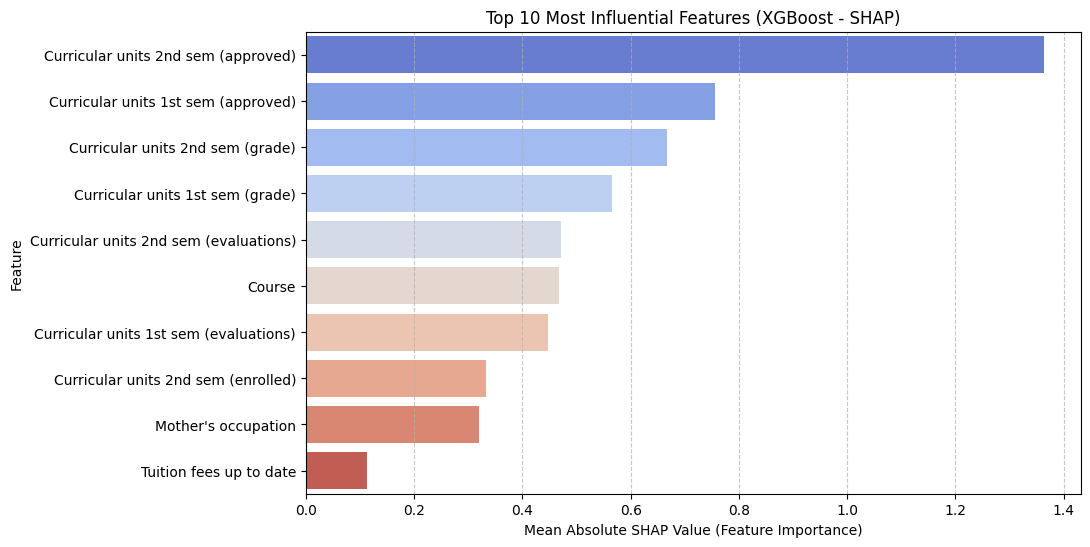


Top 10 Most Influential Features:
                                  Feature  Importance
0     Curricular units 2nd sem (approved)    1.363243
1     Curricular units 1st sem (approved)    0.756619
2        Curricular units 2nd sem (grade)    0.667270
3        Curricular units 1st sem (grade)    0.566495
6  Curricular units 2nd sem (evaluations)    0.471618
7                                  Course    0.467251
4  Curricular units 1st sem (evaluations)    0.447669
9     Curricular units 2nd sem (enrolled)    0.332000
8                     Mother's occupation    0.320091
5                 Tuition fees up to date    0.113464


In [56]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure best_models dictionary exists
best_models = {
    "Logistic Regression": best_log_reg,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "SVM": best_svm,
    "Gradient Boosting": best_gb,
    "K-Nearest Neighbors": best_knn,
    "Naïve Bayes": best_nb,
    "Decision Tree": best_dt,
    "LightGBM": best_lgbm
}

# Ensure model_scores is correctly defined
if "model_scores" not in locals():
    raise NameError(" model_scores is not defined. Ensure all models have been trained and validated.")

# Ensure model_scores is a dictionary
if not isinstance(model_scores, dict):
    raise TypeError(" model_scores must be a dictionary with model names as keys.")

# Check if model_scores contains valid entries
if len(model_scores) == 0:
    raise ValueError(" model_scores dictionary is empty. Make sure all models are evaluated.")

# Select the best model based on validation accuracy
best_model_name = max(model_scores, key=model_scores.get)

# Ensure best_model_name exists in best_models
if best_model_name not in best_models:
    raise KeyError(f" Model '{best_model_name}' not found in best_models. Check name matching.")

best_model = best_models[best_model_name]
print(f"\nUsing {best_model_name} for SHAP interpretation.")

# Convert X_train to NumPy array
X_train_np = X_train.to_numpy()
feature_names = X_train.columns.to_numpy()

# Select the correct SHAP explainer
if "Tree" in best_model.__class__.__name__ or "Forest" in best_model.__class__.__name__ or "XGB" in best_model.__class__.__name__:
    explainer = shap.TreeExplainer(best_model)  # Best for tree-based models
else:
    explainer = shap.Explainer(best_model, X_train_np)  # Use generic SHAP Explainer for other models

# Compute SHAP values with sampling to reduce memory usage
shap_sample = X_train_np[:500]  # Reduce computation by selecting 500 random samples
shap_values = explainer(shap_sample, check_additivity=False)

# Extract actual SHAP values
shap_values_array = shap_values.values  # Convert SHAP Explanation object to NumPy array

# Handle multiclass SHAP outputs
if shap_values_array.ndim == 3:
    shap_values_array = shap_values_array.mean(axis=2)  # Average across classes

# Compute absolute mean SHAP values for feature importance
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": np.abs(shap_values_array).mean(axis=0)
}).sort_values(by="Importance", ascending=False)

# Show top 10 important features
feature_importance_top10 = feature_importance.head(10)

# Plot feature importance visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    y=feature_importance_top10["Feature"], 
    x=feature_importance_top10["Importance"], 
    palette="coolwarm"
)
plt.title(f"Top 10 Most Influential Features ({best_model_name} - SHAP)")
plt.xlabel("Mean Absolute SHAP Value (Feature Importance)")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Display feature importance
print("\nTop 10 Most Influential Features:")
print(feature_importance_top10)


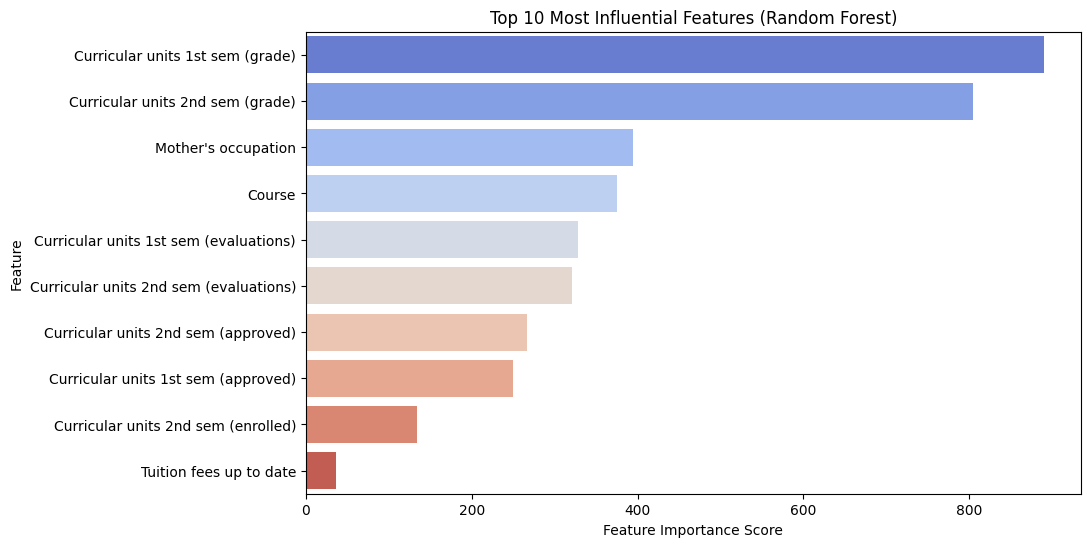


 Top 10 Most Influential Features:
                                  Feature  Importance
3        Curricular units 1st sem (grade)         890
2        Curricular units 2nd sem (grade)         804
8                     Mother's occupation         394
7                                  Course         375
4  Curricular units 1st sem (evaluations)         328
6  Curricular units 2nd sem (evaluations)         321
0     Curricular units 2nd sem (approved)         267
1     Curricular units 1st sem (approved)         250
9     Curricular units 2nd sem (enrolled)         134
5                 Tuition fees up to date          37


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Select the best model (Random Forest)
best_model = best_models["LightGBM"]

# Get feature importance from the Random Forest model
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Show top 10 important features
feature_importance_top10 = feature_importance.head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(y=feature_importance_top10["Feature"], x=feature_importance_top10["Importance"], palette="coolwarm")
plt.title("Top 10 Most Influential Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

# Display feature importance in Kaggle Notebook
print("\n Top 10 Most Influential Features:")
print(feature_importance_top10)


Perform Cross-Validation for Supervised Models


 LIME Explanation for Sample Instance:
[('Curricular units 2nd sem (approved) > 0.28', 0.1529477402441944), ('Tuition fees up to date > 0.19', 0.12449340339132334), ('Curricular units 1st sem (approved) > 0.21', 0.08513689154418805), ('Curricular units 1st sem (evaluations) > 0.27', -0.07232499608526237), ('Curricular units 1st sem (grade) > 0.69', 0.06098527104052605), ('Curricular units 2nd sem (evaluations) > 0.59', -0.05864212919986927), ('Curricular units 2nd sem (grade) > 0.69', 0.058113244033860055), ('Curricular units 2nd sem (enrolled) > 0.27', -0.0564454565522366), ('Course > 0.24', -0.04175228477207503), ("Mother's occupation > -0.10", 0.016991187925181322)]


X has feature names, but RandomForestClassifier was fitted without feature names


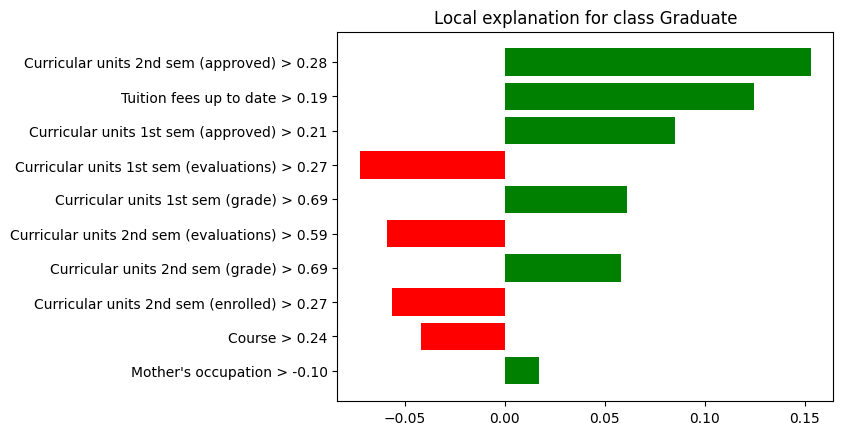

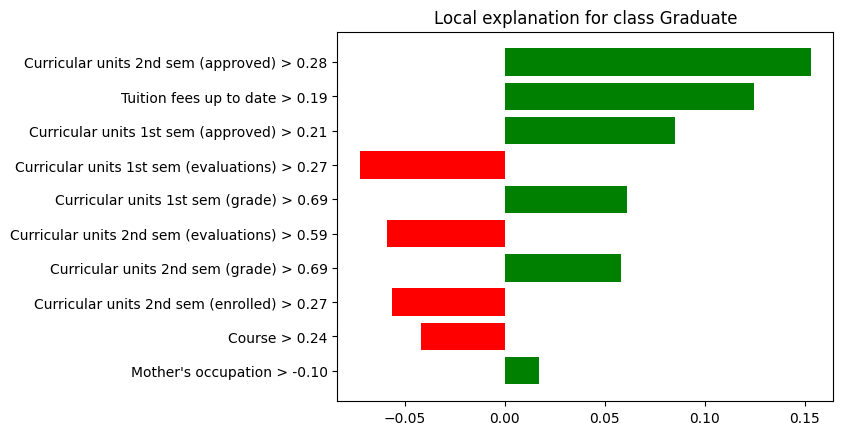

In [58]:
# Import LIME libraries
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.to_numpy(),  # Convert DataFrame to NumPy array
    feature_names=X_train.columns.tolist(),  
    class_names=["Dropout", "Graduate", "Enrolled"],  
    mode="classification"
)

# Select a random test instance for explanation
idx = np.random.randint(0, X_test.shape[0])
sample_instance = X_test.iloc[idx].values.reshape(1, -1)

#  Convert sample instance back to DataFrame with feature names
sample_instance_df = pd.DataFrame(sample_instance, columns=X_train.columns)

# Explain the prediction of the best-performing model (Random Forest)
best_model = best_models["Random Forest"]
exp = explainer.explain_instance(
    sample_instance_df.iloc[0].values,  # Ensure LIME passes a valid input
    lambda x: best_model.predict_proba(pd.DataFrame(x, columns=X_train.columns)),  # Pass DataFrame to model
    num_features=10
)

# Display textual explanation
print("\n LIME Explanation for Sample Instance:")
print(exp.as_list())  # Print feature importance explanation as a list

# Plot LIME Explanation
exp.as_pyplot_figure()


Model Interpretation & Feature Importance Analysis
The feature importance analysis from SHAP, Random Forest, and LIME reveals key insights into what influences a student's likelihood of graduating, dropping out, or staying enrolled.


Key Insights from SHAP

Top Features Based on SHAP Analysis

1. Tuition Fees Up to Date: 

*   Most influential factor in predicting student outcomes.
*   Students behind on tuition payments are more likely to drop out.
*   Implication: Financial support programs or fee payment plans could help reduce dropout rates.

  
2. Curricular Units (Grades, Approved, Enrolled, Evaluations)

* Performance in 1st and 2nd semester coursework is highly correlated with retention.
* Higher grades & approved units → More likely to graduate.Low grades & fewer evaluations → Higher dropout risk.
* Implication: Universities should provide academic intervention & support programs.


3. Course Type

* Different courses have varying dropout rates.
* Some courses may require more academic support.
* Implication: Institutions can target high-risk courses and offer personalized assistance.



# Key Insights from LightBGM Feature Importance
1. Curricular Units 1st & 2nd Semester Grades
* Most important academic predictor.
* Students with high grades are more likely to continue.
* Implication: Early academic warning systems can detect struggling students. 

3. Tuition Fees Up to Date
* Financial difficulty is one of the strongest predictors of dropout.
* Implication: Implement fee relaxation policies or scholarship opportunities.

5. Evaluations & Approvals
* Students who actively take exams and pass courses are much more likely to graduate.
* Implication: Institutions should encourage student participation in assessments.


# Key Insights from LIME (Local Interpretability)
Example Prediction Breakdown
LIME explains how individual student predictions are made:

* Curricular units approved (2nd semester) > 0.34 
 Increases dropout risk if low.
* Tuition fees up to date > 0.45 
 Higher tuition compliance reduces dropout risk.
* Curricular units enrolled (2nd semester) > 0.37 
 Indicates active participation and improves graduation probability.

Implications of Model Decisions
1. Early Identification of At-Risk Students 
*  Institutions should monitor tuition payments & academic performance to detect potential dropouts.
   
2.  Financial Assistance Can Reduce Dropout Rates 

   * Universities should provide grants, scholarships, or flexible payment plans.
3. Improving Course Engagement Helps Retention 

  * Encouraging students to take evaluations & enroll in more courses can improve graduation rates.

In [59]:
import joblib

# Save the trained XGBoost model
joblib.dump(best_models["XGBoost"], "xgboost_model.pkl")

print(" Model saved as xgboost_model.pkl")


 Model saved as xgboost_model.pkl


In [63]:
import sklearn
print(sklearn.__version__)


1.2.2


In [64]:
pip show numpy scikit-learn


Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: mkl, mkl-service, mkl_fft, mkl_random, mkl_umath, tbb4py
Required-by: accelerate, albucore, albumentations, arviz, astropy, autograd, bayesian-optimization, bigframes, blis, blosc2, bokeh, Boruta, Bottleneck, bqplot, Cartopy, catboost, category_encoders, cesium, chex, clarabel, cmdstanpy, contourpy, cudf-cu12, cufflinks, cuml-cu12, cupy-cuda12x, cuvs-cu12, cvxpy, dask-cuda, dask-cudf-cu12, datascience, datasets, datashader, db-dtypes, deap, diffusers, dipy, dopamine_rl, easyocr, eli5, fasttext, featuretools, flax, folium, fury, geemap, gensim, geopandas, gym, gymnasium, h5py, hep_ml, holoviews, hyperopt, ibis-framework, ImageHash, imageio, imbalanced-learn, imgaug, ipympl, jax, jaxlib, kaggle-environments, keras, keras-core, keras-hub, lan